# Домашнее задание 2
## Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии. Не забывайте комментировать код, чтобы было понятно, что вы делаете.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

⚠️ Данное домашнее задание является облегченной версией домашнего задания, которое дается на курсе [Машинное обучение](https://github.com/Murcha1990/ML_AI24) на программе "Искусственный интеллект". Права на изменение и применение получены. Исходник домашнего задания (base и pro) сочетает самые разные прикладные стороны обучения моделей и рекомендуется каждому к изучению. 

Всего можно набрать 24,5 балла. В пересчете на 10 балльную систему - это 10 баллов.

**Дедлайн:** до 09:00 (утра) 08.12.2025

**Формат сдачи:** файл ipynb, название файла должно быть в виде: Фамилия_БСЦ_Группа_HW2.ipynb. За неправильно названный файл полагается штраф. Сдача ДЗ ассистенту в личку Telegram: @snovasash 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

import warnings 
warnings.filterwarnings('ignore')

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтобы результат был воспроизводим в условиях существования процедур, результат которых основан на генерации псевдослучайных чисел.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [4]:
# your code here
df_train.sample(10) # 10 случайных
df_test.head(5) # 5 первых
df_test.tail(5) # 5 последних

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [5]:
dups = df_train.isna().sum() # Series с числом пропусков
if dups.sum() == 0:
    print('нет пропусков')
else:
    print('пропуски в', ', '.join(dups[dups > 0].index)) # маска "пропусков > 0" на имена колонок

пропуски в mileage, engine, max_power, torque, seats


In [6]:
flag = 0 ## трекаем нашли ли дубли
if df_train.shape[0] != df_train.drop_duplicates().shape[0]: # сравниваем размер с дублями и без дублей
    print("есть дубликаты в train")
    flag += 1
if df_test.shape[0] != df_test.drop_duplicates().shape[0]: # аналогично
    print("есть дубликаты в test")
    flag += 1
if flag == 0:
    print("нет дублей")

есть дубликаты в train
есть дубликаты в test



### **Задание 2 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [7]:
def cleaner(x):
    ''' 
    функция для обработки единиц измерения и сохранения null где они были
    '''
    x = str(x).split()[0] # берём значение без е.и.
    if x[0].isnumeric(): # если имеем число возвращаем его
        return float(x)
    return np.nan

df = pd.concat((df_train, df_test)) # чтобы не плодить одинаковый код
df.mileage = df.mileage.apply(cleaner).astype(float) # применяем функцию выше
df.engine = df.engine.apply(cleaner).astype(float)
df.max_power = df.max_power.apply(cleaner).astype(float)
df.drop(columns=['torque'], inplace=True) # дроп столбца
# расклеили df на df_train и df_test
df_train, df_test = df.iloc[:df_train.shape[0]], df.iloc[df_train.shape[0]:]
df_train.shape, df_test.shape

((6999, 12), (1000, 12))

В предыдущем задании мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [8]:
# your code here

for col in df_train.columns:
    # есть ли пропуски в трейне или в тесте по этой колонке
    if df_train[col].isna().sum() + df_test[col].isna().sum() != 0: 
        med = df_train[col].median() # медиана на тесте
        df_train[col].fillna(med, inplace=True)
        df_test[col].fillna(med, inplace=True)
        
# проверка, остались ли пропуски где-то
if sum(df_train.isna().sum() + df_test.isna().sum()) > 0:
    print('Пропуски остались')
else:
    print('Пропусков больше нет')

Пропусков больше нет


### **Задание 3 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [9]:
# your code here
df_train['engine'], df_train['seats'] = df_train['engine'].astype(int), df_train['seats'].astype(int)
df_test['engine'], df_test['seats'] = df_test['engine'].astype(int), df_test['seats'].astype(int)

### **Задание 4 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [10]:
# your code here
df_wo_target = df_train.drop('selling_price', axis=1).columns
print("Число дубликатов:", df_train.duplicated(subset=df_wo_target).sum())
display(df_train[df_train.duplicated(subset=df_wo_target)])
df_train.drop_duplicates(subset=df_wo_target, keep='first', inplace=True)
df_train = df_train.reset_index().drop('index', axis=1)

Число дубликатов: 1159


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197,82.00,5
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,85.80,5
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197,85.80,5
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999,177.00,5
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487,214.56,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.00,995,62.00,5
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.40,1498,98.63,5
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248,74.00,5
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5


In [11]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [12]:
# your code here
print("Статистики для числовых трейна")
display(df_train.describe(include='number'))
print("Статистики для числовых теста")
display(df_test.describe(include='number'))
print("Статистики для категориальных трейна")
display(df_train.describe(exclude='number'))
print("Статистики для категориальных теста")
display(df_test.describe(exclude='number'))



Статистики для числовых трейна


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Статистики для числовых теста


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


Статистики для категориальных трейна


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Статистики для категориальных теста


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

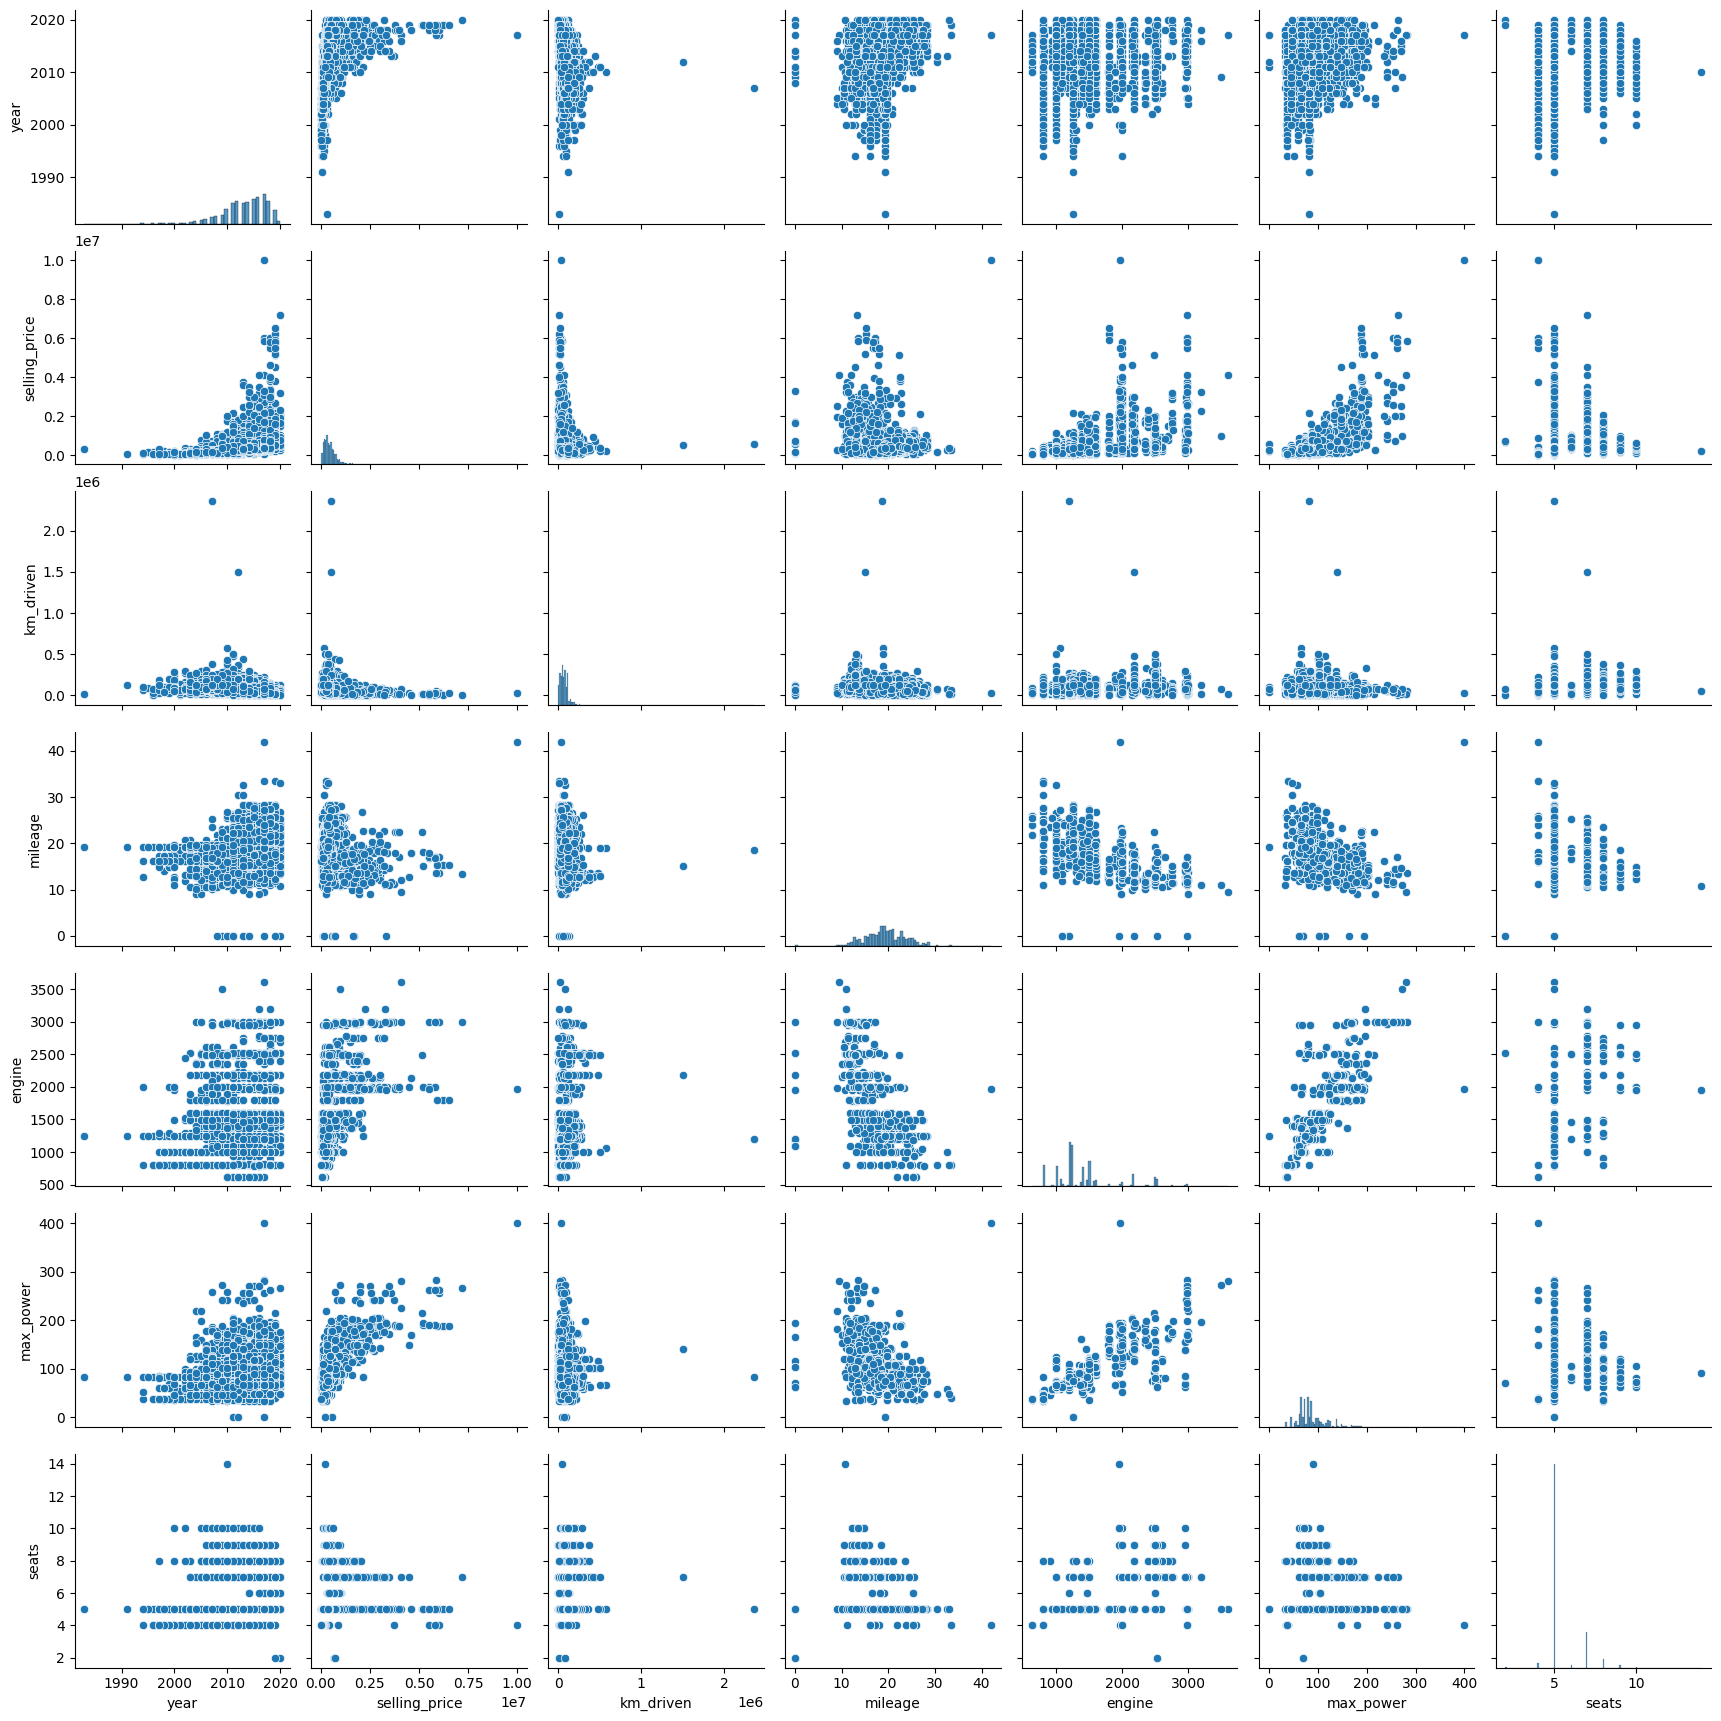

In [13]:
# your code here
sns.pairplot(df_train)
plt.show();

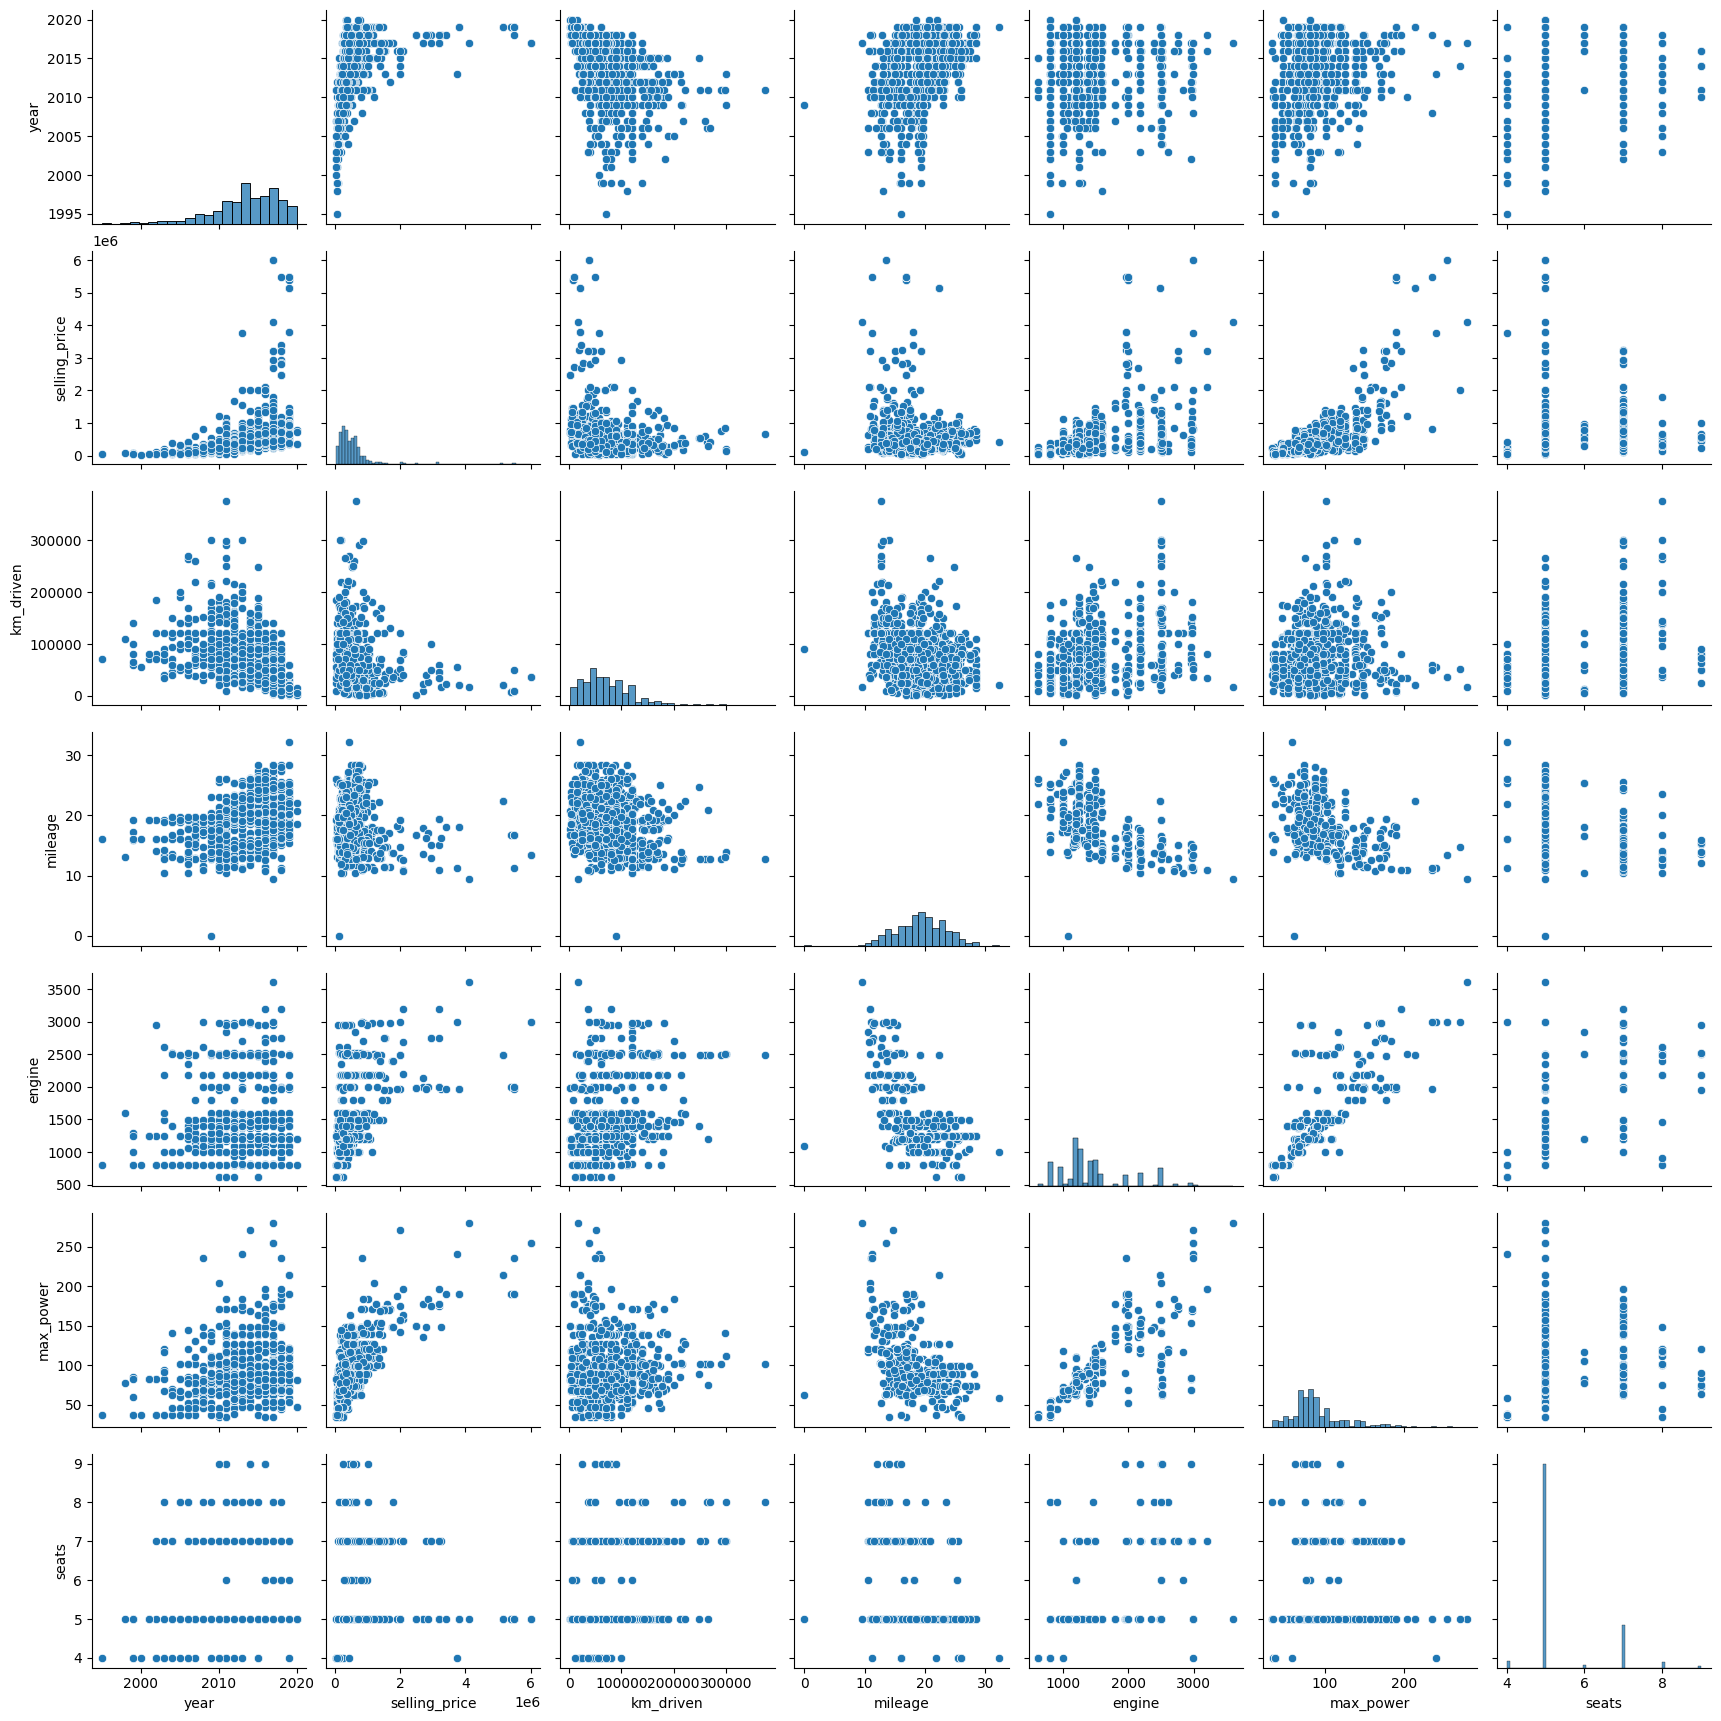

In [14]:
# your code here
sns.pairplot(df_test)
plt.show();

`Your answer here`

Шаг 1
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
    *Да, можно. К примеру, цена при продаже прямо пропорциональна максимальной мощности.*
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
    *Да, можно. К примеру, объём двигателя и мощность автомобиля связаны прямой линейной связью.*

Шаг 2
 - Похожими ли оказались совокупности при разделении на трейн и тест? 
 *Да, похожими. Попарные распределения более шумные в тесте в силу меньшей размерности данных, но выглядит так, что фичи трейна и теста из одного распределения*

### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


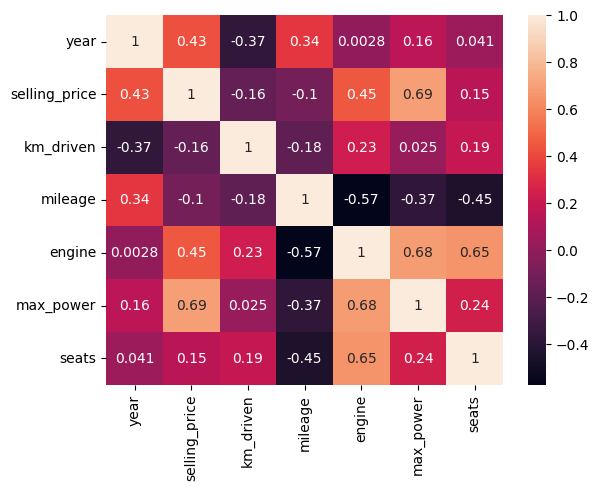

In [15]:
# your code here
sns.heatmap(df_train.corr(numeric_only=True), annot=True)
plt.show();

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`
- year и engine: год выпуска и размер двигателя (коэфф 0.0028)
- max_power и engine, seats и max_power (коэфф 0.68, 0.65 соотв.)
- Да, правильно. Между year и km_driven отрицательный коэфф. корреляции -0.37

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [16]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [17]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [18]:
y_train = df_train["selling_price"].dropna()
X_train = df_train.select_dtypes(include='number').drop('selling_price', axis=1).dropna()

In [19]:
X_train.shape

(5840, 6)

In [20]:
%%time

for i in range(1, 100000):
    i

CPU times: user 13.3 ms, sys: 3.04 ms, total: 16.4 ms
Wall time: 14.2 ms


In [21]:
assert X_train.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [22]:
y_test = df_test["selling_price"].dropna()
X_test = df_test.select_dtypes(include='number').drop('selling_price', axis=1).dropna()

In [23]:
assert X_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
def rg_report(y_true, y_pred):
    """
    функция чтобы вызывать метрики качества одной строкой и получить ухоженный вывод
    """
    assert y_true.shape == y_pred.shape, 'Переданы векторы разных размеров' # проверка на внимательность при подстановке параметров
    print('='*20)
    print('r2 score:', round(r2_score(y_true, y_pred), 4))
    print('MSE:', round(MSE(y_true, y_pred), 2))
    print('='*20)
    return None

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('Test metrics')
rg_report(y_test, y_pred)

y_pred = lr.predict(X_train)
print('\nTrain metrics')
rg_report(y_train, y_pred)

Test metrics
r2 score: 0.5941
MSE: 233297548204.61

Train metrics
r2 score: 0.5923
MSE: 116873067751.52


* R2 достаточно высокий для трейна и теста - 0.59. Модель хорошо описывает разброс таргета на основании предикторов (59% объяснённого разброса).
* MSE на тесте в 2 раза выше, чем на трейне. Таргет выражен в крупных значениях, возведение в квадрат ошибки даже одного очень плохого прогноза может иметь подобный эффект на итоговое усреднённое значение метрик 

### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [25]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train) # сразу преобразуем трейн
X_test_sc = scaler.transform(X_test) # на фите по трейну трансофрмим тест

lr = LinearRegression()

lr.fit(X_train_sc, y_train)

y_pred = lr.predict(X_test_sc)
print('Test metrics')
rg_report(y_test, y_pred)

y_pred = lr.predict(X_train_sc)
print('\nTrain metrics')
rg_report(y_train, y_pred)

Test metrics
r2 score: 0.5941
MSE: 233297548204.6

Train metrics
r2 score: 0.5923
MSE: 116873067751.52


### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [26]:
# your code here
betas = lr.coef_ # вектор коэф
mx_coef = np.argmax(np.abs(betas)) # из вектора коэф достаём индекс максимального по модулю
print(
    "Наиболее информативный признак:", 
    X_train.columns[mx_coef], # имя соотв фичи
    "\nКоэффициент при фиче:",
    betas[mx_coef]
)

Наиболее информативный признак: max_power 
Коэффициент при фиче: 322779.7032358398


Максимальная мощность - наиболее информативный признак. Цена при продаже прямо ей пропорциональна.

### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [27]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso()

lasso.fit(X_train_sc, y_train)

y_pred = lasso.predict(X_test_sc)
print('Test metrics')
rg_report(y_test, y_pred)

y_pred = lasso.predict(X_train_sc)
print('\nTrain metrics')
rg_report(y_train, y_pred)

Test metrics
r2 score: 0.5941
MSE: 233298219170.76

Train metrics
r2 score: 0.5923
MSE: 116873067761.64


Качество как и без регуляризации

In [28]:
# your code here
lasso.coef_

array([152843.08385345, -44146.91853785,  28779.20408499,  61172.02578008,
       322780.58619708, -23217.69327311])

Регуляризация не занулила ни один коэффициент. Возможно потому, что для нашей модели хорошо подобраны признаки - они все важны для задачи.

### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [29]:
from sklearn.model_selection import GridSearchCV

# your code here
from time import time

# Сетка гиперпараметров. Перебираем альфу (коэф регуляризации) по степеням 10 от 0.0001 до 100. Других по-моему нет у Лассо
param_grid = {
    'alpha': [10 ** n for n in range(-4, 2)] 
}
lasso = Lasso()

gs = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10, # 10 фолдов 
    scoring='r2' # меряем качество по r2
)

start_time = time()
gs.fit(X_train_sc, y_train)
end_time = time()

In [30]:
# your code here
print(
    "обучено моделей:", 
    len(gs.cv_results_['params']) * gs.n_splits_ # длина списка параметров * число фолдов
)
print(f"ушло на перебор: {end_time - start_time:.2f} сек")
print(f"лучшая альфа: {gs.best_params_['alpha']:.4f}")
print("Веса модели\n", gs.best_estimator_.coef_) # коэфф лучшей по r2 регрессии после перебора
print('='*30, '\n')
print("Метрики лучшей модели")

best_lasso = Lasso(**gs.best_params_)
best_lasso.fit(X_train_sc, y_train)

y_pred = best_lasso.predict(X_test_sc)
print('Test metrics')
rg_report(y_test, y_pred)

y_pred = best_lasso.predict(X_train_sc)
print('\nTrain metrics')
rg_report(y_train, y_pred)

обучено моделей: 60
ушло на перебор: 0.14 сек
лучшая альфа: 10.0000
Веса модели
 [152841.16229322 -44136.83373387  28762.59314019  61128.49193295
 322788.69169988 -23191.62877764]

Метрики лучшей модели
Test metrics
r2 score: 0.5941
MSE: 233304268624.61

Train metrics
r2 score: 0.5923
MSE: 116873068762.31


Нет не занулились. Качество не повысилось

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [31]:
from sklearn.linear_model import ElasticNet

# your code here
param_grid = {
    'alpha': [10 ** n for n in range(-4, 2)],
    'l1_ratio': [p / 10 for p in range(0, 10, 1)] # все  соотношения l1 и l2 штрафов с шагом 0.1
}
en = ElasticNet()

gs = GridSearchCV(
    estimator=en,
    param_grid=param_grid,
    cv=10, # 10 фолдов 
    scoring='r2' # меряем качество по r2
)

start_time = time()
gs.fit(X_train_sc, y_train)
end_time = time()

In [32]:
print(
    "обучено моделей:", 
    len(gs.cv_results_['params']) * gs.n_splits_ # длина списка параметров * число фолдов
)
print(f"ушло на перебор: {end_time - start_time:.2f} сек")
print(f"лучшие параметры по r2: {gs.best_params_}")
# print("Веса модели\n", gs.best_estimator_.coef_) # коэфф лучшей по r2 регрессии после перебора
print('='*30, '\n')
print("Метрики лучшей модели")

best_en = ElasticNet(**gs.best_params_)
best_en.fit(X_train_sc, y_train)

y_pred = best_en.predict(X_test_sc)
print('Test metrics')
rg_report(y_test, y_pred)

y_pred = best_en.predict(X_train_sc)
print('\nTrain metrics')
rg_report(y_train, y_pred)

обучено моделей: 600
ушло на перебор: 2.43 сек
лучшие параметры по r2: {'alpha': 1, 'l1_ratio': 0.9}

Метрики лучшей модели
Test metrics
r2 score: 0.5722
MSE: 245892672007.8

Train metrics
r2 score: 0.5884
MSE: 117992231505.22


Метрики немного ухудшились.

# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [33]:
# your code here
df_train_cat = df_train.select_dtypes(exclude='number').drop('name', axis=1)
X_train = X_train.join(df_train_cat, how='inner')
assert X_train.shape[0] == 5840

In [34]:
df_test_cat = df_test.select_dtypes(exclude='number').drop('name', axis=1) # дро имени
X_test = X_test.join(df_test_cat, how='inner') # джойн по индексу, потому что не меняли индексацию
assert X_test.shape[0] == 1000

### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [35]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
X = pd.concat((X_train, X_test)) # объединяем в один, чтобы не плодить одинакового кода
X.seats = X.seats.astype('O') # seats теперь кат типа
cat_features = X_train.select_dtypes(exclude='number').columns # имена кат фичей
X_no_cat = X[X.columns[~X_train.columns.isin(cat_features)]] # некодируемая часть

ohe = OneHotEncoder(drop='first') # дропает лишний столбец
X_ohe1 = ohe.fit_transform(X[cat_features]) # кодирует
col_names = ohe.get_feature_names_out(cat_features) # сгенерированный названия ohe фичей
X_ohe = pd.DataFrame(X_ohe1.toarray(), columns=list(col_names), index=X.index) # наша закодированная часть
X = pd.concat([X_no_cat, X_ohe], axis=1)
X_train, X_test = X.iloc[:X_train.shape[0]], X.iloc[X_train.shape[0]:] 
X_train.shape, X_test.shape

((5840, 16), (1000, 16))

### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
param_grid = {
    'alpha': [10 ** n for n in range(-4, 3)] 
}
ridge = Ridge()

gs = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10, # 10 фолдов 
    scoring='r2' # меряем качество по r2
)

gs.fit(X_train, y_train)
gs.best_params_

{'alpha': 10}

In [37]:
ridge = Ridge(**gs.best_params_)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print('Test metrics')
rg_report(y_test, y_pred)

y_pred = ridge.predict(X_train)
print('\nTrain metrics')
rg_report(y_train, y_pred)

Test metrics
r2 score: 0.6389
MSE: 207550670033.71

Train metrics
r2 score: 0.636
MSE: 104329086276.7


Да, удалось. Метрики значительно улучшились

# **Часть 4 (7 баллов) | Классификация**



In [38]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [39]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [40]:
# your code here
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

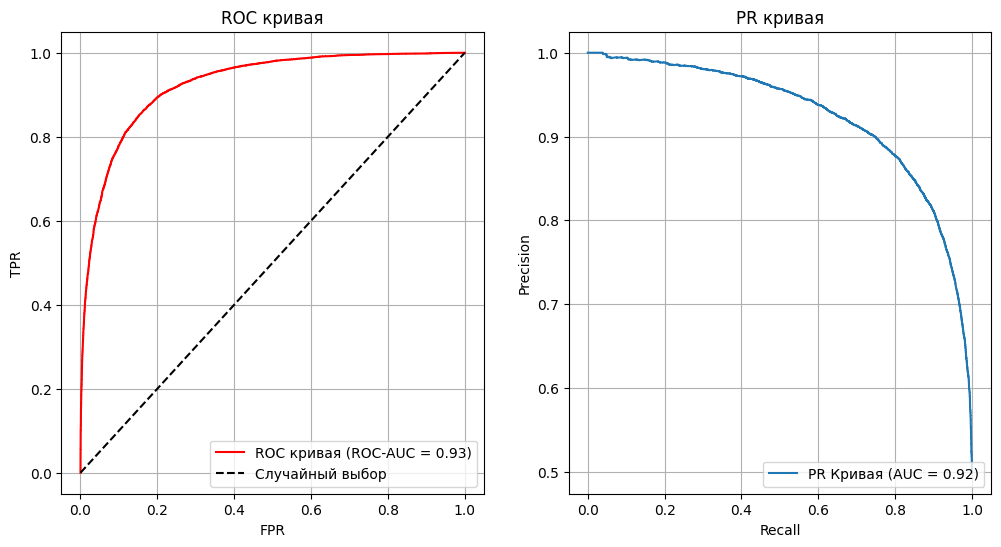

In [41]:
# your code here
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score, precision_recall_curve

# такую функцию обычно делаю для удобства оценки классификации
def clf_report(y_true, y_score):
    '''
    обёртка для метрик и отрисовки графиков по итогам классификации
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # место для двух графиков

    # строим ROC-курв
    fpr, tpr, thr = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)

    ax1.plot(fpr, tpr, color='red', label=f'ROC кривая (ROC-AUC = {roc_auc:.2f})')
    ax1.plot([0, 1], [0, 1], color='k', linestyle='--', label='Случайный выбор')
    ax1.set_xlabel('FPR')
    ax1.set_ylabel('TPR')
    ax1.set_title('ROC кривая')
    ax1.legend(loc='lower right')
    ax1.grid()

    #строим PR курв
    precision, recall, thr = precision_recall_curve(y_true, y_score)
    pr_auc = average_precision_score(y_true, y_score)

    ax2.plot(recall, precision, label=f'PR Кривая (AUC = {pr_auc:.2f})')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title(f'PR кривая')
    ax2.legend(loc='lower right')
    ax2.grid()
    
    plt.show()
    return None

y_score = logreg.predict_proba(X_test)[:, 1] # задача бин классификации, достаточно вероятностей для одного класса
clf_report(y_test, y_score)

* Крайне высокий рок-аук (0.93), модель сильно лучше случайного выбора (рокаук 0.5). Хорошая ранжирующая способность: при получении на входе объекта положительного класса и объекта отрицательного класса с вероятность 93% модель выдаст первому скор выше, чем второму.
* PR-AUC крайне высокий (0.92), что свидетельствует о высоком качестве модели в части точности определения положительного класса
* В целом, получили шикраную модель

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка train). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет. (Датасет в чате ТГ)

In [42]:
data = pd.read_csv('data/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



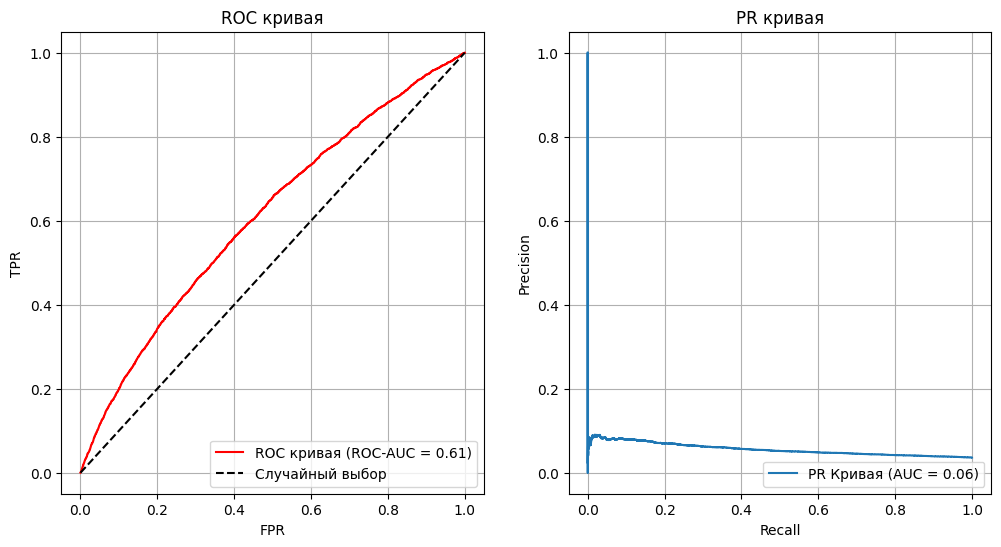

In [43]:
# your code here
from sklearn.metrics import classification_report 
# я надеюсь, что в задаче имеется ввиду именно это, потому что ВСЕ метрики классификации посчитать невозможно (e.i. бесконечное число разных f мер)
lg = LogisticRegression()

lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test, y_pred))
print('='*55)
y_score = lg.predict_proba(X_test)[:, 1]
clf_report(y_test, y_score)

Наблюдаем плохую модель в силу громадного дизбаланса классов. Вообще говоря с этим лучше что-то делать, но ладно.

### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [44]:
# your code here
cat_features = [col for col in X_train.columns if col.endswith('_cat')] # имена кат фичей
scale_columns = X_train.columns[~X_train.columns.isin(cat_features)]
X = pd.concat((X_train, X_test)) # объединяем в один, чтобы не плодить одинакового кода

ohe = OneHotEncoder(drop='first') # дропает лишний столбец
X_ohe1 = ohe.fit_transform(X[cat_features]) # кодирует
col_names = ohe.get_feature_names_out(cat_features) # сгенерированный названия ohe фичей
X_ohe = pd.DataFrame(X_ohe1.toarray(), columns=list(col_names), index=X.index) # наша закодированная часть
X_train_ohe, X_test_ohe = X_ohe.iloc[:X_train.shape[0]], X_ohe.iloc[X_train.shape[0]:] 

scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train[scale_columns]), columns=scale_columns, index=X_train.index)
X_test_sc = pd.DataFrame(scaler.transform(X_test[scale_columns]), columns=scale_columns, index=X_test.index)

X_train = pd.concat([X_train_sc, X_train_ohe], axis=1)
X_test = pd.concat([X_test_sc, X_test_ohe], axis=1)

X_train.shape, X_test.shape

((476169, 213), (119043, 213))

Получили 213 признаков

ушло на обучение: 7.94 сек

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



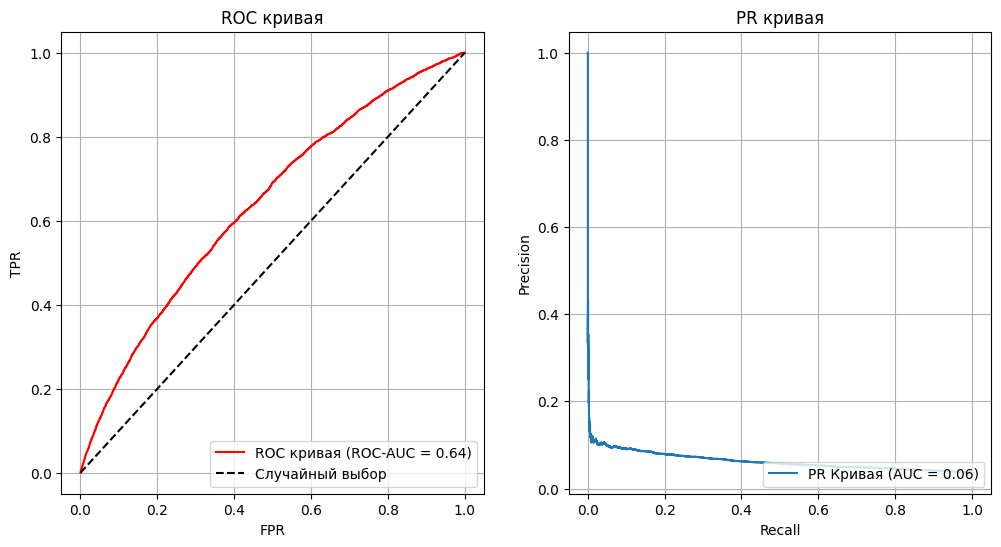

In [45]:
lg = LogisticRegression()

start_time = time()
lg.fit(X_train, y_train)
end_time = time()

print(f"ушло на обучение: {end_time - start_time:.2f} сек\n")
y_pred = lg.predict(X_test)
print(classification_report(y_test, y_pred))
print('='*55)
y_score = lg.predict_proba(X_test)[:, 1]
clf_report(y_test, y_score)

Получилась модель с чуть более лучшей ранжирующей способностью - положительному классу соответствуют более высокие скоры относительно остальных объектов по сравнению с вариантом до предобработки.

### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   7.4s
[CV] END .........................alpha=0.0001, l1_ratio=0.0; total time=   7.9s
[CV] END .........................alpha=0.0001, l1_ratio=0.0; total time=   7.9s
[CV] END .........................alpha=0.0001, l1_ratio=0.0; total time=   8.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   5.5s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   5.7s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   5.7s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   5.7s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   4.6s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   5.1s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   5.2s
[CV] END .........................alpha=0.0001,

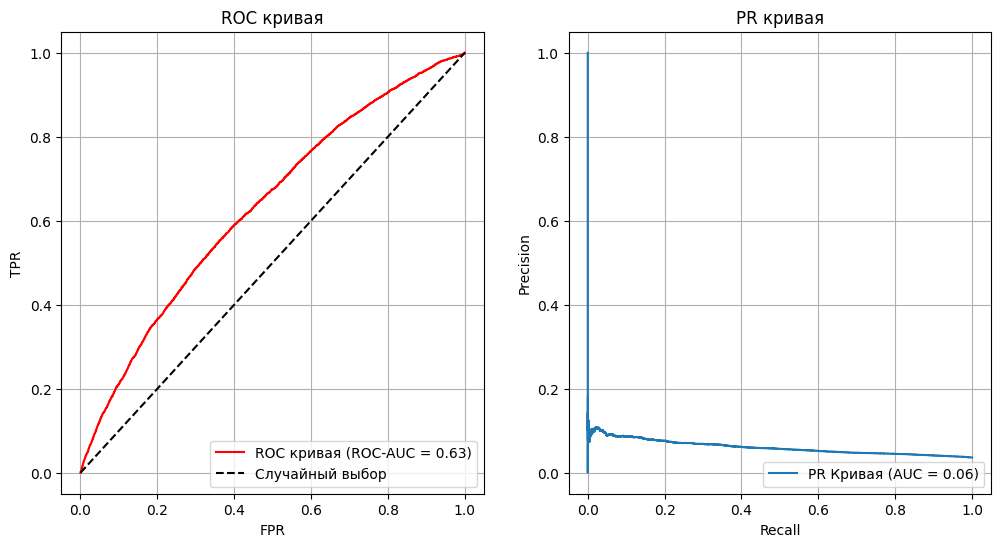

метрики на трейне
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169



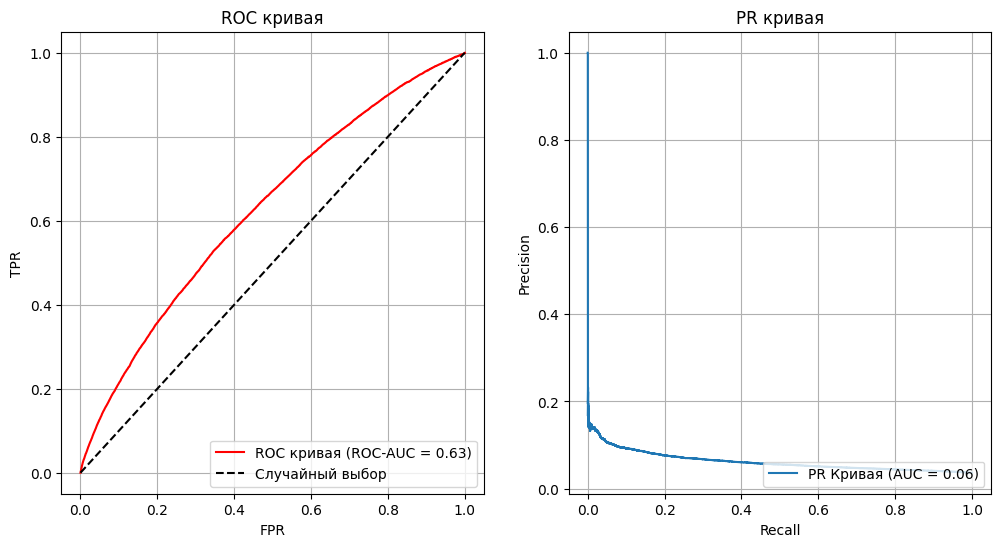

In [47]:
# your code here
# ATTENTION перебор 15 минут 
from sklearn.linear_model import SGDClassifier 

param_grid = {
    'alpha': [10 ** n for n in range(-4, 2)],
    'l1_ratio': [p / 10 for p in range(0, 10, 1)]
}
gs = GridSearchCV(
    estimator=SGDClassifier(
        loss='log_loss', 
        penalty='elasticnet'
        ), # для классификации нужен логлосс, penalty шатаем с помощь. alpha и l1_ratio от только l1 до только l2
    param_grid=param_grid, 
    cv=3,
    verbose=2,
    n_jobs=4
)
gs.fit(X_train, y_train)
best_params = gs.best_params_
best_params['loss'] = 'log_loss' # нужный лосс чтобы передать в параметры через **
best_params['penalty'] = 'elasticnet'

sgd_clf = SGDClassifier(**best_params)
sgd_clf.fit(X_train, y_train)
print('метрики на тесте')
y_pred = sgd_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('='*55)
y_score = sgd_clf.predict_proba(X_test)[:, 1]
clf_report(y_test, y_score)

print('метрики на трейне')
y_pred = sgd_clf.predict(X_train)
print(classification_report(y_train, y_pred))
print('='*55)
y_score = sgd_clf.predict_proba(X_train)[:, 1]
clf_report(y_train, y_score)

Метрики не улучшились по сравнению с предыдущими моделями. Ранняя просадка PR кривой на тестесигнализирует о том, что модель плохо уловливает задачу. В целом модель плохая из-за дизбаланса классов.